# Modelo de ARIMA

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
from pmdarima import auto_arima

In [17]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('../data/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

C:\Users\oderl\AppData\Local\Temp\ipykernel_8328\3583839631.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('../data/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)


In [18]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


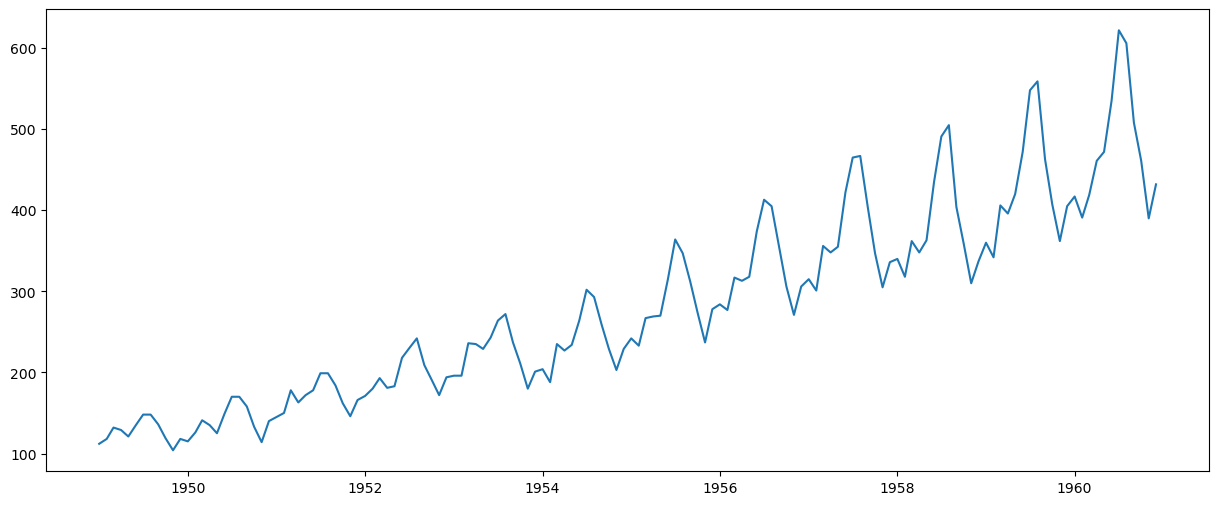

In [19]:
plt.plot(df)

In [20]:
stepwise_model = auto_arima(df, start_p=1, start_q=1, start_d=0, start_P=0, max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.10 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.37 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.57 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.13 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.48 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.84 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.28 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.63 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=3.32 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.29 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.71 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.20 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.72 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=2.19 sec
 ARIM

In [21]:
print(stepwise_model.aic())

1012.9907964607311


In [22]:
train = df.loc['1949-01-01':'1959-12-01']
test = df.loc['1960-01-01':]

In [23]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [24]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [25]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [26]:
future_forecast = stepwise_model.predict(n_periods=12)

In [27]:
future_forecast

1960-01-01    420.213032
1960-02-01    398.422975
1960-03-01    461.861657
1960-04-01    450.643293
1960-05-01    473.946513
1960-06-01    537.896820
1960-07-01    612.193971
1960-08-01    623.543474
1960-09-01    520.119431
1960-10-01    462.266593
1960-11-01    412.871384
1960-12-01    453.678318
Freq: MS, dtype: float64

In [28]:
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=['#Passengers'])

<Axes: xlabel='Month'>

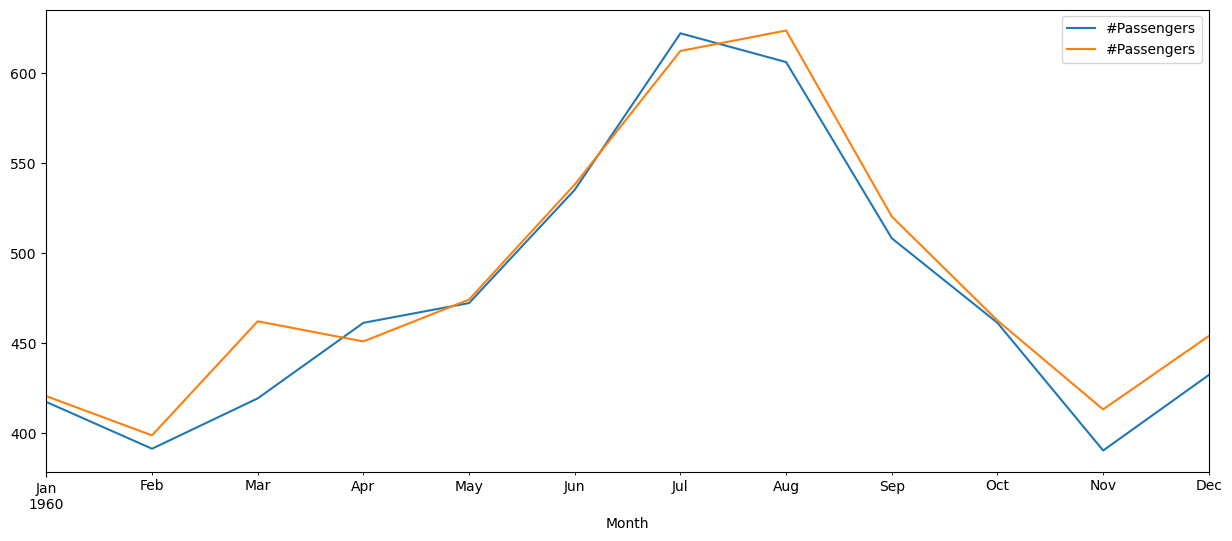

In [29]:
# azul teste, laranja forencast
pd.concat([test, future_forecast], axis=1).plot()

<Axes: xlabel='Month'>

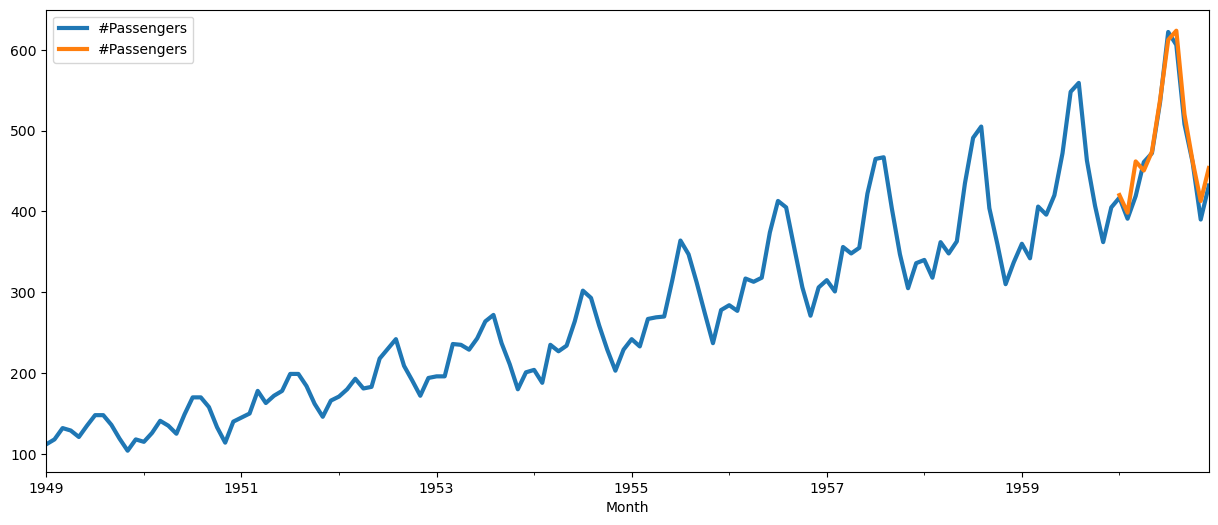

In [31]:
pd.concat([df, future_forecast], axis=1).plot(linewidth=3)